In [1]:
import monkdata as m
from dtree import *
import dtree as d
import numpy as np

import random
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]


In [2]:
var = []
var_all = []
mean = []

for j in range(4):
    rate_correct = []
    monk1train, monk1val = partition(m.monk3, 0.3)
    t = d.buildTree(monk1train, m.attributes)

    # prunning, this return many different possibilities
    m_prun = allPruned(t)

    for i in range( len(m_prun) ):
      rate_correct.append(d.check(m_prun[i], monk1val))
    print(rate_correct)
    
    mean.append( np.mean(rate_correct) ) # average of the all possibilities

    var_all = np.var(mean)  # this is the variance of each 4 rounds

    print('one round')
    i +=1
mean_mean = np.mean(mean)    

[0.46511627906976744, 0.5813953488372093, 0.7790697674418605, 0.6976744186046512, 0.7441860465116279, 0.7209302325581395, 0.7209302325581395]
one round
[0.47674418604651164, 0.8023255813953488, 0.9186046511627907, 0.872093023255814, 0.8604651162790697, 0.9069767441860465, 0.9069767441860465]
one round
[0.47674418604651164, 0.8023255813953488, 0.872093023255814, 0.8255813953488372]
one round
[0.45348837209302323, 0.7558139534883721, 0.8372093023255814, 0.8372093023255814, 0.872093023255814, 0.8953488372093024, 0.7906976744186046]
one round


In [3]:
print(mean_mean)
print(var_all)

0.7537375415282392
0.0029199112040705914


In [14]:
var = []
var_all = []
mean = []
mean_mean = []

for k in [0.3,0.4,0.5,0.6,0.7,0.8]:
    for j in range(20):
        rate_correct = []
        monk1train, monk1val = partition(m.monk3, k)
        t = d.buildTree(monk1train, m.attributes)

    # prunning, this return many different possibilities
        m_prun = allPruned(t)

        for i in range( len(m_prun) ):
          rate_correct.append(d.check(m_prun[i], monk1val))
        #print(rate_correct)
    
        mean.append( np.mean(rate_correct) ) # average of the all possibilities

   

        #print('one round')
        i +=1
    
    mean_mean.append( np.mean(mean) ) 
    var_all.append(np.var(mean))
print(mean_mean)
print(var_all)

[np.float64(0.7414421834625323), np.float64(0.7663001935603679), np.float64(0.7773761811302319), np.float64(0.7882855912924558), np.float64(0.7932677736732656), np.float64(0.8001395782941548)]
[np.float64(0.00282595292897959), np.float64(0.003155061733876244), np.float64(0.0028370036887026017), np.float64(0.0027600268968090195), np.float64(0.002830605361195435), np.float64(0.00296818926660176)]


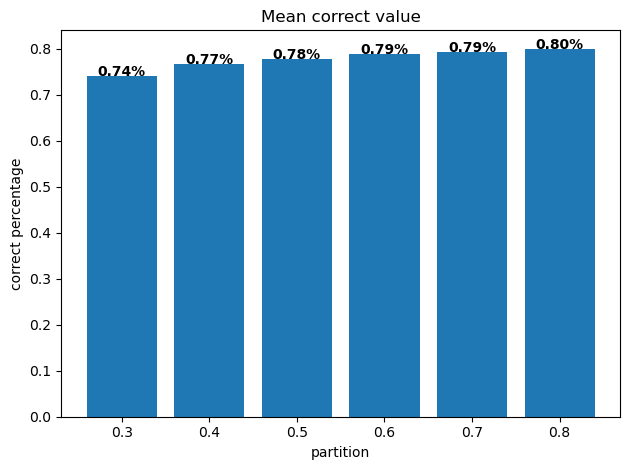

In [15]:
import matplotlib.pyplot as plt

# Sample data

x = ['0.3','0.4','0.5','0.6','0.7','0.8']
y1 = mean_mean
y2 = var_all

# Create a plot
plt.bar(x, y1)

for i, v in enumerate(y1):
    plt.text(i, v , f"{v:.2f}%", ha='center', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("partition")
plt.ylabel("correct percentage")
plt.title("Mean correct value")

plt.tight_layout()
# Show the plot

plt.savefig('mean_monk3.png')
plt.show()

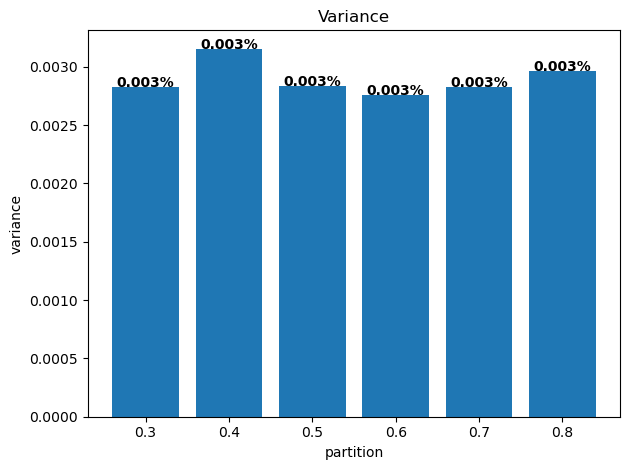

In [16]:
import matplotlib.pyplot as plt

# Sample data

x = ['0.3','0.4','0.5','0.6','0.7','0.8']
y1 = mean_mean
y2 = var_all

# Create a plot
plt.bar(x, y2)

for i, v in enumerate(y2):
    plt.text(i, v , f"{v:.3f}%", ha='center', fontsize=10, fontweight='bold')

# Labels and title\
plt.xlabel("partition")
plt.ylabel("variance")
plt.title("Variance")
plt.tight_layout()
# Show the plot

plt.savefig('variance_monk3.png')

plt.show()